`Visitor` helps in separating algorithms from data structures and has a similar goal to
that of the `observer` pattern. It allows extending the functionalities of a given class
without changing its code. But the visitor goes a bit further by defning a class that
is responsible for holding data and pushes the algorithms to other classes called
`Visitors`. Each visitor is specialized in one algorithm and can apply it on the data

`Visitor` pattern is implemented by providing an entry point in the data class that can
be visited by all kinds of visitors. A generic description is a `Visitable` class that
accepts `Visitor` instances and calls them, as shown in the following fgure:

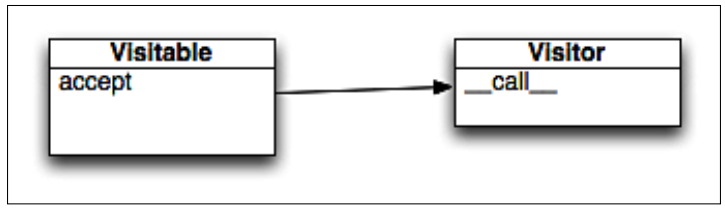

The `Visitable` class decides how it calls the `Visitor` class, for instance, by deciding
which method is called. For example, a visitor in charge of printing `built-in` type
content can implement the `visit_TYPENAME()` methods, and each of these types can
call the given method in its `accept()` method:

In [1]:
class VisitableList(list):
    def accept(self, visitor):
        visitor.visit_list(self)

class VisitableDict(dict):
    def accept(self, visitor):
        visitor.visit_dict(self)

class Printer(object):
    def visit_list(self, instance):
        print("list content: {}".format(instance))
    def visit_dict(self, instance):
        print("dict keys: {}".format(",".join(instance.keys())))

In [2]:
visitable_list = VisitableList([1, 2, 5])
visitable_list.accept(Printer())

list content: [1, 2, 5]


In [3]:
visitable_dict = VisitableDict({"one": 1, "two": 2, "three": 3})
visitable_dict.accept(Printer())

dict keys: one,two,three


But this pattern means that each visited class needs to have an `accept` method to be
visited, which is quite painful

In [13]:
from typing import Callable
def visit(visited, visitor):
    class_name = visited.__class__.__name__
    method_name = "visit_%s" % class_name
    method = getattr(visitor, method_name, None)
    if isinstance(method, Callable):
        method(visited)
    else:
        raise AttributeError("No suitable '{}' method in visitor".format(method_name))        

In [14]:
visit([1, 2, 3], Printer())

list content: [1, 2, 3]


In [15]:
visit((1, 2, 3), Printer())  # will raise error since there's no visit_tuple method in Printer()

AttributeError: No suitable 'visit_tuple' method in visitor

This pattern is used in this way in the `ast` module, for instance, by the `NodeVisitor`
class that calls the visitor with each node of the compiled code tree. 

Another example is a directory walker that calls Visitor methods depending on the
fle extension:

In [17]:
import os

def visit(directory, visitor):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # foo.txt → txt
            ext = os.path.splitext(file)[-1][1:]
            if hasattr(visitor, ext):
                getattr(visitor, ext)(file)

class FileReader:
    @staticmethod
    def pdf(filename):
        print("Processing: {}".format(filename))


walker = visit("C:/Users/Cigar/Desktop/ref", FileReader())

Processing: 2017mocas_170321150332.pdf
Processing: Collaborative Similarity Embedding for Recommender Systems.pdf
Processing: Deep Speech 2  End-to-End Speech Recognition in English and Mandarin.pdf
Processing: Item Similarity Learning Methods for Collaborative Filtering Recommender Systems.pdf
Processing: Item2vec Neural Item Embedding for Collaborative Filtering.pdf
Processing: Predicting Pairwise Relations with Neural Similarity Encoders.pdf
Processing: Similarity Learning with (or without) Convolutional Neural Network.pdf
Processing: Youtube短视频推荐系统变迁：从机器学习到深度学习.pdf
Processing: 美团点评机器学习平台介绍-V1.0 (1).pdf


If your application has data structures that are visited by more than one algorithm,
the **Visitor pattern** will help in separating concerns. It is better for a data container
to focus only on providing access to data and holding them, and nothing else.